In [1]:
# to handel missing values
from sklearn.impute import SimpleImputer 

# to handel feature scaling
from sklearn.preprocessing import StandardScaler

# for ordinal encoding
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder

# to build pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import pandas as pd
import numpy as np

import pickle , os


import matplotlib as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"D:\ineuron\practice\ML_projects\project_tasks\deliverytime_ML_model\data\processed\final_processed_data.csv")

In [3]:
len(df.columns)

19

In [4]:
df = df.drop(labels=["Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude"], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24728 entries, 0 to 24727
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Delivery_person_Age       24728 non-null  float64
 1   Delivery_person_Ratings   24728 non-null  float64
 2   Weather_conditions        24728 non-null  object 
 3   Road_traffic_density      24728 non-null  object 
 4   Vehicle_condition         24728 non-null  int64  
 5   Type_of_order             24728 non-null  object 
 6   Type_of_vehicle           24728 non-null  object 
 7   multiple_deliveries       24728 non-null  float64
 8   Festival                  24728 non-null  object 
 9   City                      24728 non-null  object 
 10  Time_taken (min)          24728 non-null  int64  
 11  Time_Orderd_hour          24728 non-null  int64  
 12  Time_Orderd_minute        24728 non-null  int64  
 13  Time_Order_picked_hour    24728 non-null  int64  
 14  Time_O

In [6]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Time_Orderd_hour,Time_Orderd_minute,Time_Order_picked_hour,Time_Order_picked_minute
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21,55,22,10
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14,55,22,10
2,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,9,20,22,10
3,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19,50,22,10
4,29.0,4.5,Sandstorms,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,20,20,25,22,10


In [7]:
# Weather_conditions , Road_traffic_density, Type_of_order, Type_of_vehicle,Festival,City
# df[['Weather_conditions' , 'Road_traffic_density', 'Type_of_order', 'Type_of_vehicle','Festival','City']]


In [8]:

numerical_columns = df.select_dtypes(exclude = "object")
cat_for_ord_columns = df[["Weather_conditions","Road_traffic_density", "Festival"]]
cat_for_ohe_columns = df[['Type_of_order', 'Type_of_vehicle', 'City']]
categorical_columns =  df.select_dtypes(include = "object")


In [9]:
# column Weather_conditions : ['Fog' 'Stormy' 'Sandstorms' 'Windy' 'Cloudy' 'Sunny'] =============
#   count :  6
# column Road_traffic_density : ['Jam' 'High' 'Low' 'Medium'] ===============
#   count :  4
# column Type_of_order : ['Snack' 'Meal' 'Buffet' 'Drinks'] 
#   count :  4
# column Type_of_vehicle : ['motorcycle' 'scooter' 'electric_scooter'] 
#   count :  3
# column Festival : ['No' 'Yes'] ===============
#   count :  2
# column City : ['Metropolitian' 'Urban' 'Semi-Urban'] 
#   count :  3

In [10]:
# define rankinking in order way

# weather = {"Fog" :1, "Stormy":2,"Sandstorms":3,"Windy":4, "Cloudy":5, "Sunny":6}
# traffic = {'Jam':4,'High':3,'Medium':2,'Low':1}
# festival = {'No':0, 'Yes':1}

wather_cat = ["Fog", "Stormy","Sandstorms","Windy", "Cloudy", "Sunny"]

traffic_cat = ['Low','Medium','High','Jam']

festival_cat = ['No', 'Yes']



#-------------------------------------------------------------------------#

typeoforder = ['Snack' 'Meal' 'Buffet' 'Drinks']

typeofvehicle = ['motorcycle' 'scooter' 'electric_scooter']

city = ['Metropolitian' 'Urban' 'Semi-Urban']

In [11]:
 # automating numerical pipleine



class Process_num():

    def __init__(self,df):
        self.df = df
        self.numerical_columns = df.select_dtypes(exclude = "object")
        
    # handel missing values and null values
    def num_imputer(self):
        
        df_test = self.numerical_columns.copy() # create a copy of the original DataFrame
        N_imputer = SimpleImputer(strategy="median")
        df_test = pd.DataFrame(N_imputer.fit_transform(df_test), columns=df_test.columns)
        return df_test

    def compile_num(self):
        new_numerical_columns = pd.concat([self.num_imputer()], axis=1)
        return new_numerical_columns

    # scale values - normalize for better stability

    def scaler_num(self):
        df_test = self.numerical_columns.copy()
        # Initialize StandardScaler object
        scaler = StandardScaler()
        # Fit and transform the data using the scaler object
        df_test2 = pd.DataFrame(scaler.fit_transform(df_test.values), columns=df_test.columns)
        return df_test2



In [12]:
# automating catagorical pipeline


class Process_cat():

    def __init__(self,df):
        self.df = df

    # handel missing values

    def cat_imputer(self):
        categorical_columns =  self.df.select_dtypes(include = "object")
        df_test = categorical_columns.copy() # create a copy of the original DataFrame
        C_imputer = SimpleImputer(strategy="most_frequent")
        df_test = pd.DataFrame(C_imputer.fit_transform(df_test), columns=df_test.columns)
        return df_test
    
    # ordinal encoding

    def ord_cat(self):
        cat_for_ord_columns = df[["Weather_conditions","Road_traffic_density", "Festival"]]
        df_test = cat_for_ord_columns.copy()
        ord_colums = ["Weather_conditions","Road_traffic_density", "Festival"]
        wather_cat = ["Fog", "Stormy","Sandstorms","Windy", "Cloudy", "Sunny"]
        traffic_cat = ['Low','Medium','High','Jam']
        festival_cat = ['No', 'Yes']
        if [i for i in df_test.columns] == ["Weather_conditions","Road_traffic_density", "Festival"]:
            # Initialize the OrdinalEncoder
            ordinal_encode = OrdinalEncoder(categories=[wather_cat,traffic_cat,festival_cat])
            # Fit and transform the categorical variable
            df_test[ord_colums] = ordinal_encode.fit_transform(df_test[ord_colums])
        return df_test


    # one hot encoding 
    def ohe_cat(self):
        cat_for_ohe_columns = df[['Type_of_order', 'Type_of_vehicle', 'City']]
        df_test = cat_for_ohe_columns.copy()
        onh_colums = ['Type_of_order', 'Type_of_vehicle', 'City']
        if [i for i in df_test.columns] == ['Type_of_order', 'Type_of_vehicle', 'City']:
            # pandas data frame
            df_encoded = pd.get_dummies(df_test[[i for i in onh_colums]])
        return df_encoded

    def compile_cat(self):
        new_categorical_columns = pd.concat([self.ord_cat(),self.ohe_cat()], axis=1)
        return new_categorical_columns

    # scale values
    def scaler_cat(self):
        df_test = self.compile_cat()
        # Initialize StandardScaler object
        scaler = StandardScaler()
        # Fit and transform the data using the scaler object
        df_test2 = pd.DataFrame(scaler.fit_transform(df_test.values), columns=df_test.columns)

        return df_test2



In [13]:
num_pro = Process_num(df)
cat_pro = Process_cat(df)


In [14]:
# sunny.savita@ineuron.ai

In [15]:
# numcol = num_pro.scaler_num()
# numcol.head()

In [16]:
# catcol = cat_pro.scaler_cat()
# catcol.head()

In [17]:
# processed_df = pd.concat([numcol,catcol],axis=1)

In [18]:
pipeline1 = Pipeline([
    
        ("num_pro", Process_num(df) ),
        ("cat_pro", Process_cat(df))
    
])

In [19]:
# indepenednt and dependent features

x = df.drop(labels=["Time_taken (min)"], axis=1)

y =  df[["Time_taken (min)"]]


from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=30)

In [20]:
# column_transformer.fit_transform(x_train)

In [21]:
# Preprocess the data
numcol = num_pro.scaler_num()
catcol = cat_pro.scaler_cat()
processed_df_array = pd.concat([numcol, catcol], axis=1)

# Save the processed data to a pickle file
pickel_location = os.path.join(r"../../deliverytime_ML_model/data/interim/")

with open(pickel_location+'processed_data.pickle', 'wb') as f:
    pickle.dump(processed_df_array, f)
    f.close()


In machine learning, it's common to generate pickle files after training a model so that the trained model can be easily loaded into memory for making predictions on new data. Here are some common steps where you might generate pickled models:

After preprocessing the data: Before training a model, you may need to preprocess the data, such as scaling or normalizing features. You can save the preprocessor object as a pickled file, so you can reuse it later when transforming new data.

After training the model: Once the model has been trained, you can store the model object as a pickled file. This way, you can load the model into memory at any time and use it to make predictions on new data without needing to retrain the model each time.

After fine-tuning the model: If you fine-tune a pre-trained model, you can store the updated model as a pickled file, so you can reuse it later for similar tasks.

After optimizing hyperparameters: If you've optimized the hyperparameters of a model, you can store the best-performing model as a pickled file for future use.

In summary, pickling a machine learning model is useful whenever you want to save the model for later use, especially when training a large or complex model can be computationally expensive. Additionally, pickling can be useful when working in distributed environments or collaborating with others who may not have access to your original code or data.

In [22]:
processed_df_array.head() # this can be stored as a pcikel file

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),Time_Orderd_hour,Time_Orderd_minute,Time_Order_picked_hour,Time_Order_picked_minute,Weather_conditions,...,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban
0,1.101634,-1.361269,1.226295,3.932576,2.079416,0.776154,1.799638,0.0,0.0,-1.453026,...,-0.568260,-0.578969,-0.582829,1.726094,-0.290794,0.835186,-0.706485,0.545759,-0.063401,-0.539578
1,-1.499604,0.216444,0.002425,0.440656,-0.385071,-0.789687,1.799638,0.0,0.0,-0.868145,...,-0.568260,-0.578969,1.715768,-0.579343,-0.290794,0.835186,-0.706485,0.545759,-0.063401,-0.539578
2,0.754802,-1.045726,-1.221445,-1.305304,-0.706525,-1.908145,-0.768988,0.0,0.0,-0.283263,...,1.759759,-0.578969,-0.582829,-0.579343,-0.290794,0.835186,-0.706485,0.545759,-0.063401,-0.539578
3,-0.979356,0.216444,0.002425,0.440656,1.543658,0.328771,1.432691,0.0,0.0,-1.453026,...,-0.568260,-0.578969,-0.582829,1.726094,-0.290794,-1.197338,1.415458,0.545759,-0.063401,-0.539578
4,-0.112277,-0.414641,1.226295,0.440656,-0.706525,0.552462,-0.402042,0.0,0.0,-0.283263,...,1.759759,-0.578969,-0.582829,-0.579343,3.438855,-1.197338,-0.706485,0.545759,-0.063401,-0.539578


In [23]:
# Load the pickled data
with open(pickel_location+'processed_data.pickle', 'rb') as f:
    processed_df_array = pickle.load(f)
    # print(pd.DataFrame(processed_df_array))
    f.close()


In [24]:
numcol = num_pro.compile_num()
# numcol.head()
catcol = cat_pro.compile_cat()
# catcol.head()
# processed_df = pd.concat([numcol,catcol],axis=1)

processed_df = pd.concat([numcol,catcol],axis=1)
processed_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),Time_Orderd_hour,Time_Orderd_minute,Time_Order_picked_hour,Time_Order_picked_minute,Weather_conditions,...,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban
0,36.0,4.2,2.0,3.0,46.0,21.0,55.0,22.0,10.0,0.0,...,0,0,0,1,0,1,0,1,0,0
1,21.0,4.7,1.0,1.0,23.0,14.0,55.0,22.0,10.0,1.0,...,0,0,1,0,0,1,0,1,0,0
2,34.0,4.3,0.0,0.0,20.0,9.0,20.0,22.0,10.0,2.0,...,1,0,0,0,0,1,0,1,0,0
3,24.0,4.7,1.0,1.0,41.0,19.0,50.0,22.0,10.0,0.0,...,0,0,0,1,0,0,1,1,0,0
4,29.0,4.5,2.0,1.0,20.0,20.0,25.0,22.0,10.0,2.0,...,1,0,0,0,1,0,0,1,0,0


In [25]:
# data with on ground distance
df_new = pd.read_csv(r"D:\ineuron\practice\ML_projects\project_tasks\deliverytime_ML_model\data\raw\data2.csv")
df_new = df_new.drop(columns=["Unnamed: 0", "ID","Order_Date", "Delivery_person_ID", "Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude" ], axis=1)
# # Create a boolean mask for invalid time formats
# invalid_time = (~df_new['Time_Orderd'].str.contains(':')) | (df_new['Time_Orderd'].str.len() != 5)
# # Drop rows with invalid time formats
# df = df_new[~invalid_time]
# # Create a boolean mask for invalid time formats
# invalid_time = (~df_new['Time_Order_picked'].str.contains(':')) | (df_new['Time_Order_picked'].str.len() != 5)
# # Drop rows with invalid time formats
# df_new = df_new[~invalid_time]
df_new = df_new["onground_dist"].copy()

df_new.head()

0    13.5
1     8.6
2    21.5
3     4.7
4    31.4
Name: onground_dist, dtype: float64

In [26]:
# df = df.drop(columns=["Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude"], axis=1)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Time_Orderd_hour,Time_Orderd_minute,Time_Order_picked_hour,Time_Order_picked_minute
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21,55,22,10
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14,55,22,10
2,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,9,20,22,10
3,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19,50,22,10
4,29.0,4.5,Sandstorms,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,20,20,25,22,10


In [27]:
df = pd.concat([df, df_new], axis=1)

In [28]:
df.to_csv(r"D:\ineuron\practice\ML_projects\project_tasks\deliverytime_ML_model\data\processed\final_processed_data2.csv")

In [29]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Time_Orderd_hour,Time_Orderd_minute,Time_Order_picked_hour,Time_Order_picked_minute,onground_dist
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21,55,22,10,13.5
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14,55,22,10,8.6
2,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,9,20,22,10,21.5
3,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19,50,22,10,4.7
4,29.0,4.5,Sandstorms,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,20,20,25,22,10,31.4


In [30]:
num_pro = Process_num(df)
cat_pro = Process_cat(df)

numcol = num_pro.compile_num()
# numcol.head()
catcol = cat_pro.compile_cat()
# catcol.head()
# processed_df = pd.concat([numcol,catcol],axis=1)

processed_df = pd.concat([numcol,catcol],axis=1)
processed_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),Time_Orderd_hour,Time_Orderd_minute,Time_Order_picked_hour,Time_Order_picked_minute,onground_dist,...,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban
0,36.0,4.2,2.0,3.0,46.0,21.0,55.0,22.0,10.0,13.5,...,0,0,0,1,0,1,0,1,0,0
1,21.0,4.7,1.0,1.0,23.0,14.0,55.0,22.0,10.0,8.6,...,0,0,1,0,0,1,0,1,0,0
2,34.0,4.3,0.0,0.0,20.0,9.0,20.0,22.0,10.0,21.5,...,1,0,0,0,0,1,0,1,0,0
3,24.0,4.7,1.0,1.0,41.0,19.0,50.0,22.0,10.0,4.7,...,0,0,0,1,0,0,1,1,0,0
4,29.0,4.5,2.0,1.0,20.0,20.0,25.0,22.0,10.0,31.4,...,1,0,0,0,1,0,0,1,0,0


In [31]:
# indepenednt and dependent features

x = processed_df.drop(labels=["Time_taken (min)"], axis=1)

y =  processed_df[["Time_taken (min)"]]


from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=30)

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
pipeline = make_pipeline("model",LinearRegression())

In [33]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((17309, 22), (17309, 1), (7419, 22), (7419, 1))

In [34]:
model = LinearRegression()

In [35]:
model.fit(x_train,y_train)

LinearRegression()

In [36]:
ypred = model.predict(x_test)

In [37]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [38]:
# regression = LinearRegression() # object of model

# regression.fit(X_train,y_train)

# split the data into training and testing sets
X_train, X_test, y_train, y_test =  train_test_split(x,y,test_size=0.3,random_state=30)

# create an instance of the LinearRegression class
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# predict the output for the test data
y_pred = model.predict(X_test)

In [39]:
model.coef_

array([[ 3.65152647e-01, -7.61444626e+00, -2.15903578e+00,
         3.50580233e+00,  1.45219828e-01,  1.71404290e-03,
         5.32907052e-15, -6.21724894e-15, -1.25399018e-02,
        -6.11175331e-01,  2.34803268e+00,  1.04092811e+01,
         6.50196248e-03, -6.72821511e-03,  2.48854167e-02,
        -2.46591640e-02,  5.04277430e-01, -4.29228101e-02,
        -4.61354620e-01, -2.61978985e+00,  7.66676677e+00,
        -5.04697692e+00]])

In [40]:
def evaluate_model(true,predict):
    mae = mean_absolute_error(true,predict)
    msa = mean_squared_error(true,predict)
    r2 = r2_score(true,predict)
    rmse = np.sqrt(mean_squared_error(true,predict))
    return mae, msa, rmse, r2


# model dictonary
models_dict={ 
    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "ElasticNet" : ElasticNet()
}

In [41]:
# empty variables

train_model_list = list()
model_list = dict()
r2_list = list()

# loops 

for i in models_dict.values():
    models = i
    models.fit(X_train,y_train)

    # predictions
    y_pred  = models.predict(X_test)

    mae, msa, rmse, r2_square=evaluate_model(y_test,y_pred)
    
    print("Model name : ", i)
    print("---"*10)

    
    print('Model Training Performance')
    print("- - - "*5)
    print("RMSE:",rmse)
    print("MSA:",msa)
    print("MAE:",mae)
    print("R2 score",r2_square*100)
    r2_list.append(r2_square*100)
    print("- - - "*5)
    print('='*35)
    print('\n')
    model_list[i]=(r2_square*100)

    
for i in model_list:
    if model_list[i]==max(r2_list):
        print(i)
        train_model_list.append((i,model_list[i]))

print([i for i in model_list],"\n",train_model_list,"\n",r2_list)


Model name :  LinearRegression()
------------------------------
Model Training Performance
- - - - - - - - - - - - - - - 
RMSE: 6.48513679833392
MSA: 42.05699929310472
MAE: 5.150516472399144
R2 score 51.254242473276804
- - - - - - - - - - - - - - - 


Model name :  Lasso()
------------------------------
Model Training Performance
- - - - - - - - - - - - - - - 
RMSE: 7.448127431328963
MSA: 55.47460223331498
MAE: 5.984558233503314
R2 score 35.70269979294653
- - - - - - - - - - - - - - - 


Model name :  Ridge()
------------------------------
Model Training Performance
- - - - - - - - - - - - - - - 
RMSE: 6.485028243438094
MSA: 42.05559131818978
MAE: 5.150514611148293
R2 score 51.25587437295964
- - - - - - - - - - - - - - - 


Model name :  ElasticNet()
------------------------------
Model Training Performance
- - - - - - - - - - - - - - - 
RMSE: 7.471349005486772
MSA: 55.821055961788176
MAE: 5.998993902308213
R2 score 35.30114595586258
- - - - - - - - - - - - - - - 


Ridge()
[LinearRegr

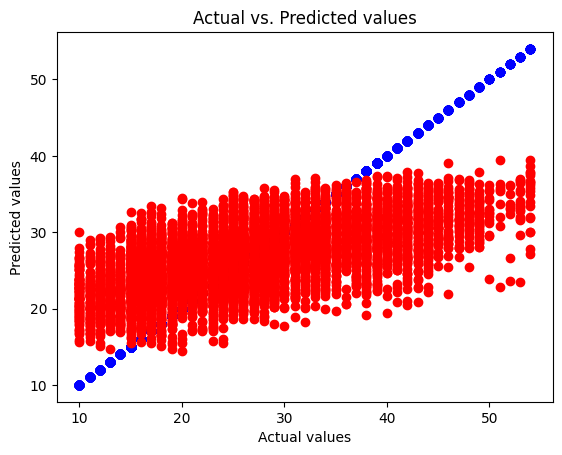

In [42]:
import matplotlib.pyplot as plt

# plot the actual values
plt.scatter(y_test, y_test, color='blue')

# plot the predicted values
plt.scatter(y_test, y_pred, color='red')

# add labels and title
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values')

# show the plot
plt.show()

In [43]:
"""

# Create objects of Process_num and Process_cat classes
num_pro = Process_num(df)
cat_pro = Process_cat(df)

# Preprocess numerical data
num_data_imputed = num_pro.num_imputer()
scaler_num = StandardScaler()
num_data_scaled = pd.DataFrame(scaler_num.fit_transform(num_data_imputed), columns=num_pro.numerical_columns.columns)

# Save the scaler_num object
import joblib
joblib.dump(scaler_num, pickel_location+"scaler_num.pkl")

# Preprocess categorical data
cat_data_imputed = cat_pro.cat_imputer()
ord_cat_data = cat_pro.ord_cat()
ohe_cat_data = cat_pro.ohe_cat()
cat_data = pd.concat([ord_cat_data, ohe_cat_data], axis=1)

# Save the scaler_cat object
scaler_cat = StandardScaler()
scaler_cat.fit(cat_data)
joblib.dump(scaler_cat, pickel_location+"scaler_cat.pkl")

# Train a linear regression model on the preprocessed data
from sklearn.linear_model import LinearRegression

target = df["Time_taken (min)"]
lin_reg_model = LinearRegression()
lin_reg_model.fit(pd.concat([num_data_scaled, cat_data], axis=1), target)

# Predict delivery times on new data
new_num_data = numerical_columns.copy() # preprocess the new numerical data
new_numerical_columns_imputed = num_pro.num_imputer(numerical_columns)
new_numerical_columns_scaled = pd.DataFrame(scaler_num.transform(new_numerical_columns_imputed), columns=num_pro.numerical_columns.columns)

new_cat_data_imputed = categorical_columns.copy() # preprocess the new categorical data
new_ord_cat_data = cat_pro.ord_cat(categorical_columns)
new_ohe_cat_data = cat_pro.ohe_cat(categorical_columns)
new_cat_data = pd.concat([new_ord_cat_data, new_ohe_cat_data], axis=1)

# Load the saved scaler objects
scaler_num = joblib.load(pickel_location+"scaler_num.pkl")
scaler_cat = joblib.load(pickel_location+"scaler_cat.pkl")

# Transform new data using the saved scaler objects
new_numerical_columns_scaled = pd.DataFrame(scaler_num.transform(new_numerical_columns_imputed), columns=num_pro.numerical_columns.columns)
new_cat_data_scaled = pd.DataFrame(scaler_cat.transform(new_cat_data), columns=cat_data.columns)

new_data = pd.concat([new_numerical_columns_scaled, new_cat_data_scaled], axis=1)

# Get scaled predictions
scaled_predictions = lin_reg_model.predict(new_data)

# Inverse transform the scaled predictions to get the predicted delivery times in minutes
predicted_delivery_times = scaler_num.inverse_transform(scaled_predictions.reshape(-1, 1)).flatten()
"""

'\n\n# Create objects of Process_num and Process_cat classes\nnum_pro = Process_num(df)\ncat_pro = Process_cat(df)\n\n# Preprocess numerical data\nnum_data_imputed = num_pro.num_imputer()\nscaler_num = StandardScaler()\nnum_data_scaled = pd.DataFrame(scaler_num.fit_transform(num_data_imputed), columns=num_pro.numerical_columns.columns)\n\n# Save the scaler_num object\nimport joblib\njoblib.dump(scaler_num, pickel_location+"scaler_num.pkl")\n\n# Preprocess categorical data\ncat_data_imputed = cat_pro.cat_imputer()\nord_cat_data = cat_pro.ord_cat()\nohe_cat_data = cat_pro.ohe_cat()\ncat_data = pd.concat([ord_cat_data, ohe_cat_data], axis=1)\n\n# Save the scaler_cat object\nscaler_cat = StandardScaler()\nscaler_cat.fit(cat_data)\njoblib.dump(scaler_cat, pickel_location+"scaler_cat.pkl")\n\n# Train a linear regression model on the preprocessed data\nfrom sklearn.linear_model import LinearRegression\n\ntarget = df["Time_taken (min)"]\nlin_reg_model = LinearRegression()\nlin_reg_model.fit(pd

In [44]:
# df.columns

In [45]:
# indepenednt and dependent features
df = pd.read_csv(r"D:\ineuron\practice\ML_projects\project_tasks\deliverytime_ML_model\data\processed\final_processed_data.csv")

# x = df.drop(labels=["Time_taken (min)"], axis=1)

# y =  df[["Time_taken (min)"]]

x = df.drop(labels="Time_taken (min)",axis=1)

y = df[["Time_taken (min)"]]

categorical_cols = x.select_dtypes(include='object').columns
numerical_cols = x.select_dtypes(exclude='object').columns

In [46]:
# Define numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder', OrdinalEncoder(categories=cat_for_ord_columns)),
    ('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
    ('scaler', StandardScaler())
])

# Define column transformer
column_transformer = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_columns.columns),
    ('cat', cat_pipeline, categorical_columns.columns)
])


In [47]:
numerical_columns.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)', 'Time_Orderd_hour',
       'Time_Orderd_minute', 'Time_Order_picked_hour',
       'Time_Order_picked_minute'],
      dtype='object')

In [48]:

# train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=30)

In [49]:
x_train.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_Orderd_hour', 'Time_Orderd_minute', 'Time_Order_picked_hour',
       'Time_Order_picked_minute'],
      dtype='object')

In [50]:
X_train_transformed = column_transformer.fit_transform(df)

InvalidParameterError: The 'categories' parameter of OrdinalEncoder must be a str among {'auto'} or an instance of 'list'. Got       Weather_conditions Road_traffic_density Festival
0                    Fog                  Jam       No
1                 Stormy                 High       No
2             Sandstorms                  Low       No
3                    Fog                  Jam       No
4             Sandstorms                  Jam       No
...                  ...                  ...      ...
24723             Cloudy               Medium      Yes
24724              Windy                  Jam       No
24725              Windy                 High       No
24726             Cloudy                 High       No
24727                Fog               Medium       No

[24728 rows x 3 columns] instead.